In [219]:
from qiskit import *
from qiskit.aqua.circuits.gates import cry

from qiskit.visualization import plot_histogram
import numpy as np
import random

import matplotlib.pyplot as plt

In [203]:
theta = 2*np.pi/3
thetaR = np.pi/4
time =2

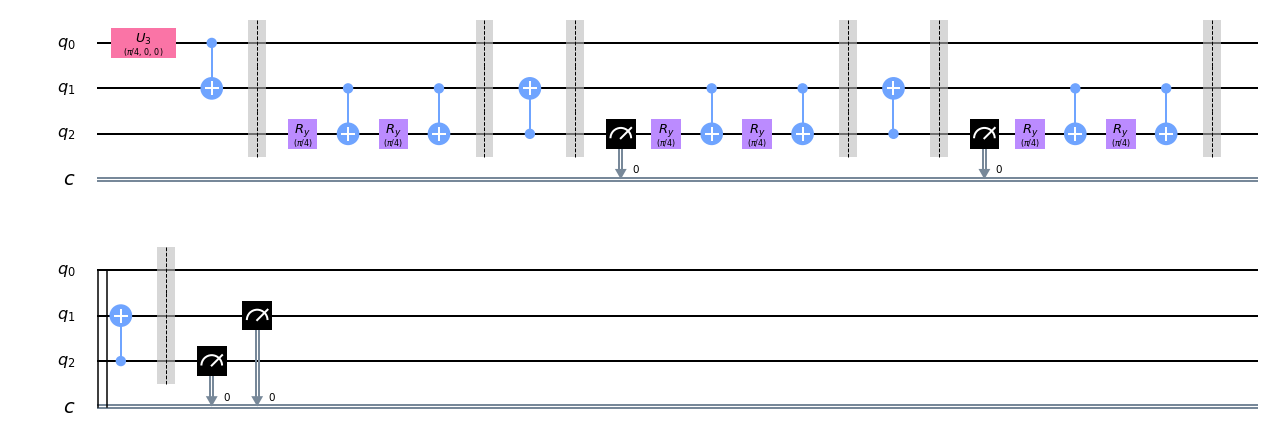

In [117]:
qc = QuantumCircuit(3,1)
qc.u3(theta,0,0,0)
qc.cx(0,1)
qc.barrier()
qc.ry(theta,2)
qc.cx(1,2)
qc.ry(theta,2)
qc.cx(1,2)
qc.barrier()
qc.cx(2,1)
qc.barrier()
qc.measure([2],[0])
qc.ry(theta,2)
qc.cx(1,2)
qc.ry(theta,2)
qc.cx(1,2)
qc.barrier()
qc.cx(2,1)
qc.barrier()
qc.measure([2],[0])
qc.ry(theta,2)
qc.cx(1,2)
qc.ry(theta,2)
qc.cx(1,2)
qc.barrier()
qc.cx(2,1)
qc.barrier()
qc.measure([2],[0])
qc.measure([1],[0])
qc.draw(output='mpl')


In [228]:
def getMeasure(qc, shots=8192):
    sim = Aer.get_backend('qasm_simulator') 
    # the device to run on

    job3 = execute(qc, sim, shots=shots)

    # Grab results from the job
    result3 = job3.result()

    # Returns counts
    counts3 = result3.get_counts()
    a = counts3.get('0')/shots
    b = counts3.get('1')/shots
    #print(f"Los resultados han sido 0:{a} y 1:{b}")
    print(f"El valor esperado es {a-b}")


def getResult(qc,shots=8192):
    sim = Aer.get_backend('qasm_simulator') 
    # the device to run on

    job3 = execute(qc, sim, shots=shots)

    # Grab results from the job
    result3 = job3.result()

    # Returns counts
    counts3 = result3.get_counts()
    a = counts3.get('0')/shots
    if '1' not in counts3:
        return 1
    b = counts3.get('1')/shots
    #print(f"Los resultados han sido 0:{a} y 1:{b}")
    return a-b

# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.ry(thetaR,sub_q[1])
sub_circ.cx(0,1)
sub_circ.ry(-thetaR,1)
sub_circ.cx(0,1)
sub_circ.cx(1,0)

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()





In [233]:
def getCircuit(time=3, initial=theta):
    qc = QuantumCircuit(j+2,1)
    
    qc.u3(initial,0,0,0)
    qc.cx(0,1)
    qc.barrier()
    for i in range(0,time):
        #cry
        qc.append(sub_inst, [1,i+2])
        qc.measure([i+2],[0])
        qc.barrier()
    qc.measure([1],[0])
    return qc

La medida en 0 antes de cNot
El valor esperado es -0.5107421875
La medida en 1 despues de cNot
El valor esperado es -0.510009765625
Estamos en el tiempo 1
El valor esperado es 0.26123046875
Estamos en el tiempo 2
El valor esperado es 0.6318359375
Estamos en el tiempo 3
El valor esperado es 0.8095703125
Estamos en el tiempo 4
El valor esperado es 0.90869140625
Estamos en el tiempo 5
El valor esperado es 0.95947265625


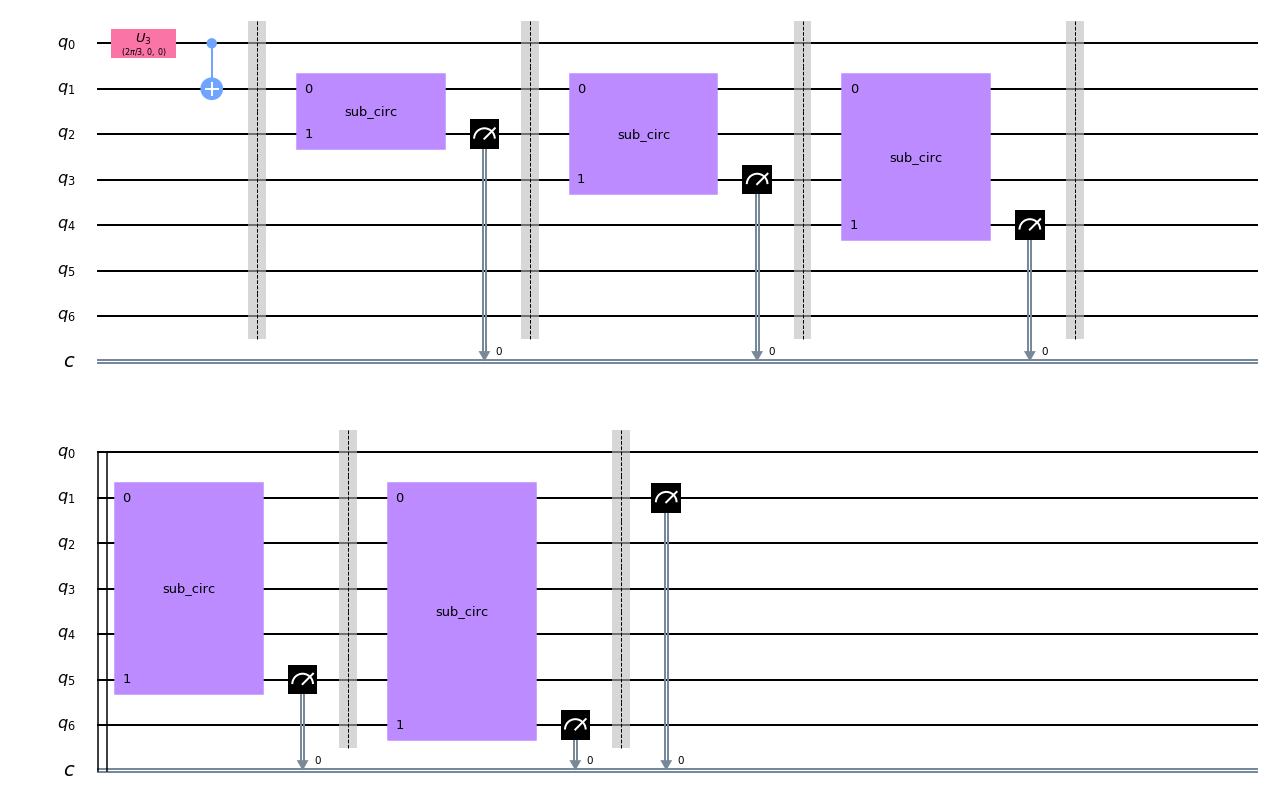

In [205]:
"""qc = QuantumCircuit(3,1)
qc.u3(theta,0,0,0)
qc.barrier()
qc.measure(0,0)
qc.barrier()
qc.cx(0,1)
qc.barrier()
print("La medida en 0 antes de cNot")
getMeasure(qc)


qc = QuantumCircuit(3,1)
qc.u3(theta,0,0,0)
qc.cx(0,1)
qc.barrier()
qc.measure(1,0)
print("La medida en 1 despues de cNot")
getMeasure(qc)"""

maxTime = 6
for j in range(1,maxTime):
    qc = QuantumCircuit(j+2,1)
    
    qc.u3(theta,0,0,0)
    qc.cx(0,1)
    qc.barrier()
    for i in range(0,j):
        #cry
        qc.append(sub_inst, [1,i+2])
        qc.measure([i+2],[0])
        qc.barrier()
    qc.measure([1],[0])
    print(f"Estamos en el tiempo {j}")
    getMeasure(qc)
    
    
qc.draw(output='mpl')

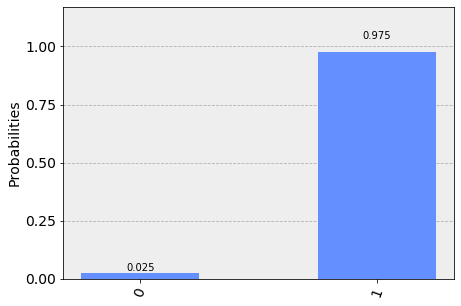

In [166]:
sim = Aer.get_backend('qasm_simulator') 
# the device to run on

job3 = execute(qc, sim, shots=8192)

# Grab results from the job
result3 = job3.result()

# Returns counts
counts3 = result3.get_counts()
plot_histogram(counts3)

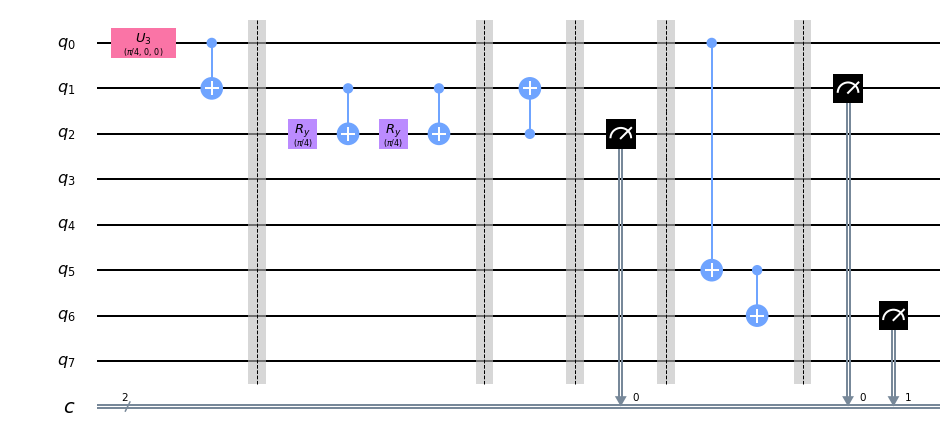

In [156]:
time =3
qc = QuantumCircuit(2*(time+1),2)
qc.u3(theta,0,0,0)
qc.cx(0,1)

# One time pass
qc.barrier()
qc.ry(theta,2)
qc.cx(1,2)
qc.ry(theta,2)
qc.cx(1,2)
qc.barrier()
qc.cx(2,1)
qc.barrier()
qc.measure([2],[0])
qc.barrier()

# Clone

qc.cx(0,time+2)
qc.cx(time+2,time+3)
qc.barrier()
qc.measure(1,0)
qc.measure(time+3,1)
qc.draw(output='mpl')

0
0
0


QiskitError: 'Index out of range.'

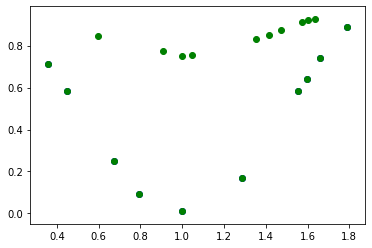

In [237]:
shot = 10
x =  []
y = []
for i in range(int(shot)):
    if(i%10==0):
        print(i)
    rand = random.uniform(0, 2)
    x+= [rand]
    qc = getCircuit(time = 1, initial=rand*np.pi)
    y += [getResult(qc)]
plt.scatter(x, y,c="b")
for i in range(int(shot)):
    if(i%10==0):
        print(i)
    rand = random.uniform(0, 2)
    x+= [rand]
    qc = getCircuit(time = 3, initial=rand*np.pi)
    y += [getResult(qc)]
plt.scatter(x, y,c="g")
for i in range(int(shot)):
    if(i%10==0):
        print(i)
    rand = random.uniform(0, 2)
    x+= [rand]
    qc = getCircuit(time = 6, initial=rand*np.pi)
    y += [getResult(qc)]
plt.scatter(x, y, c="r")

plt.show()